<H3>PRI 2022: second
    project delivery</H3>

**GROUP 1**
- Robin Helbig, ist1105007
- Karolina Kowalczyk, ist1105122
- Hubert Budny, ist1105348

<H2>Main facilities</H2>

<h3>Part I: clustering</h3>

*Load documents*

In [1]:
from helper.documentHelper import read_files, intToCategory
from mainFunctions.clustering.clustering import clustering
from mainFunctions.clustering.evaluate import evaluate
from mainFunctions.clustering.interpret import interpret
from mainFunctions.clustering.evaluate import plot_dendrogram
from mainFunctions.clustering.evaluate import pca_plot
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from matplotlib import pyplot as plt

from mainFunctions.relevance.extraction import check_accuracy_documents_bayes_idf_position, \
    check_accuracy_documents_bayes_no_idf_cosine, check_accuracy_documents_bayes_idf_cosine, \
    check_accuracy_documents_bayes_no_idf_position, feature_extraction_tf_idf, map_vectors_to_data_frame, naive_bayes, \
    knn_model, check_accuracy_documents_bayes_no_idf, check_accuracy_documents_knn_idf, \
    check_accuracy_documents_bayes_idf, check_accuracy_documents_knn_no_idf

text_processing = True
documents = read_files(text_processing)

args = {'n_clusters': 7, 'max_df': 0.07, 'criteria': 'mean'}

*A) Clustering*

In [2]:
#code here
cluster_model = clustering(documents, args)
cluster_data = cluster_model.labels_

*B) Visualization*



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.02532

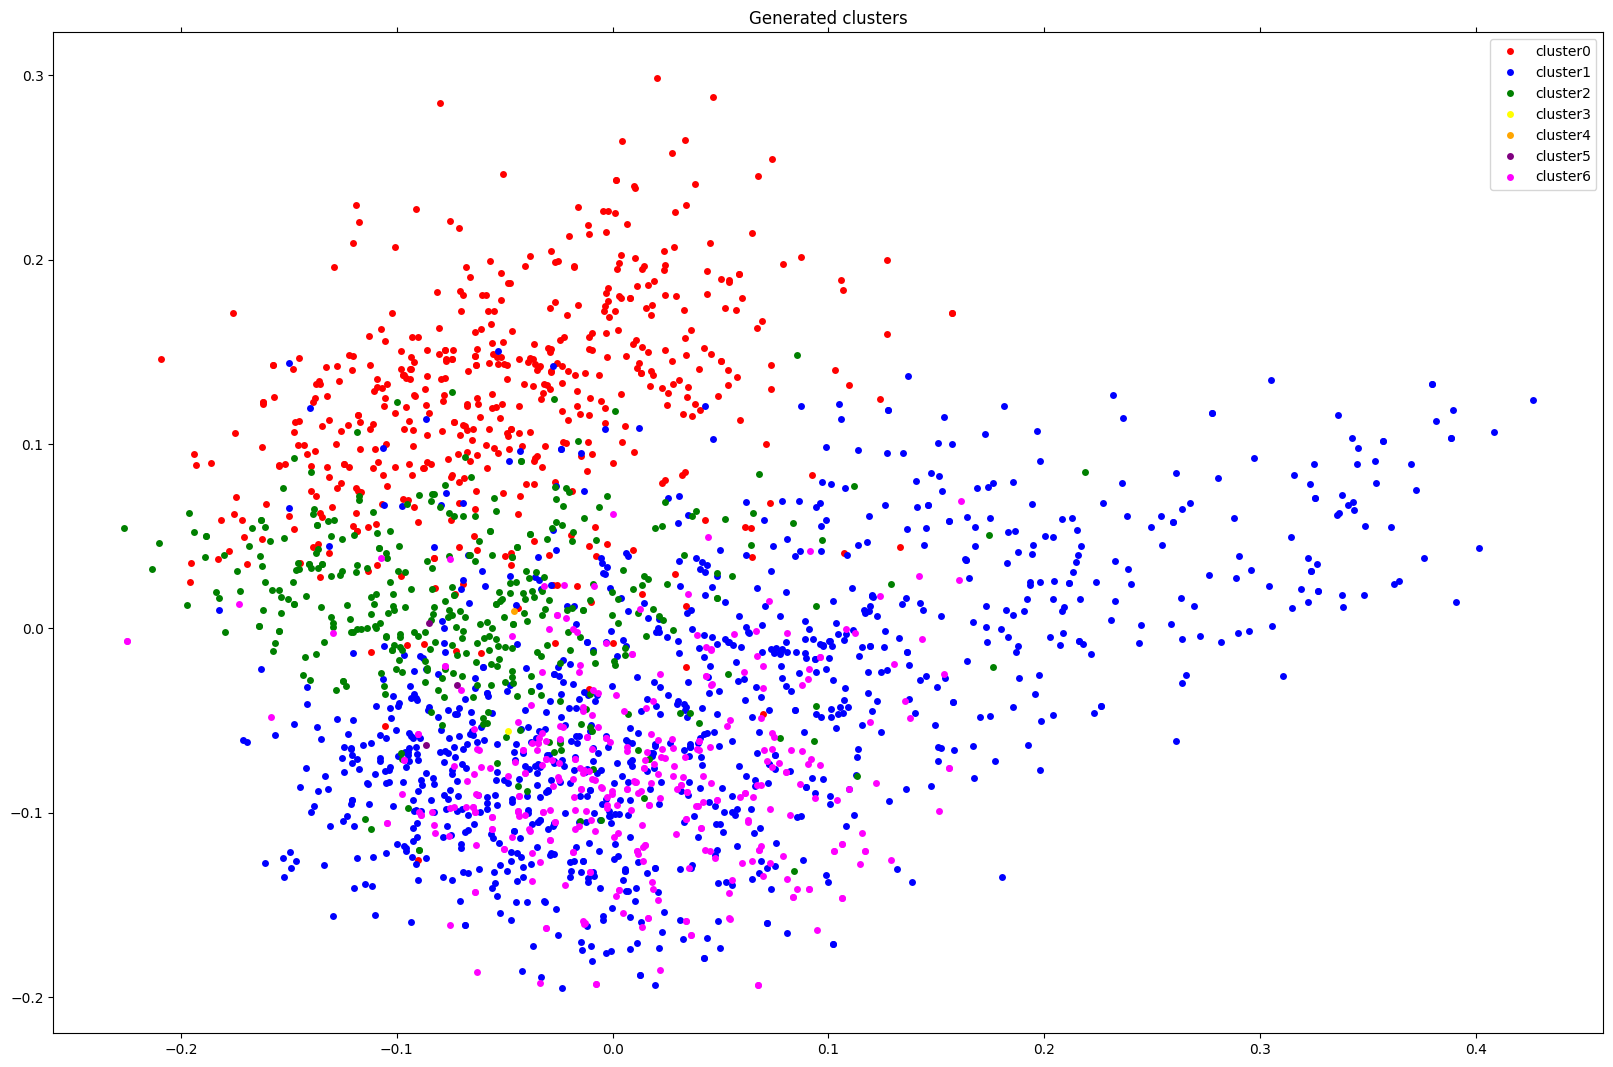

In [3]:
#code and charts here
print("\n\nMost important terms per cluster:")
relevant_term_list = interpret(cluster_data, documents, args)
for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
    print("Cluster: " + str(index))
    for i in range(10):
        term = cluster_relevant_terms[i][0]
        tfidf = cluster_relevant_terms[i][1]
        print("Term: " + term + ", TFIDF: " + str(tfidf))
    print("\n")

pca_plot(cluster_data, documents)

*C) Evaluation*



Evaluation:
Silhouette score: 0.014244019766509094
Ran score:  0.5840523733343097
Purity score: 0.736629213483146

Dendrogram: 


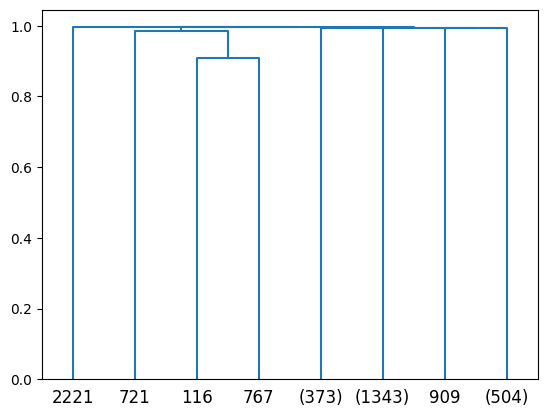

In [4]:
#code, statistics and/or charts here
sil_score, ran_score, pur_score = evaluate(cluster_data, documents)

print("\n\nEvaluation:")
print("Silhouette score: " + str(sil_score))
print("Ran score: ", str(ran_score))
print("Purity score: " + str(pur_score))

print("\nDendrogram: ")
plot_dendrogram(cluster_model, truncate_mode='level', p=3)

<h3>Part II: classification</h3>

*A) Feature extraction*

In [5]:
#code and statistics here
vectors = feature_extraction_tf_idf(documents[0], True)
vectors_no_idf = feature_extraction_tf_idf(documents[0], False)
print(vectors[0].to_string() + "\n" + vectors[1].to_string() + "\n" + vectors[2].to_string())
print(vectors_no_idf[0].to_string() + "\n" + vectors_no_idf[1].to_string()+ "\n" + vectors_no_idf[2].to_string())

Position: 1 Similarity: [[0.66263768]] In summary: True
Position: 2 Similarity: [[0.60578779]] In summary: False
Position: 3 Similarity: [[0.33898756]] In summary: True
Position: 1 Similarity: [[0.66263768]] In summary: True
Position: 2 Similarity: [[0.60578779]] In summary: False
Position: 3 Similarity: [[0.33898756]] In summary: True


*B) Classification*

In [6]:
#code here
(data_bayes_idf, output_bayes_idf) = map_vectors_to_data_frame(vectors)
(data_bayes_no_idf, output_bayes_no_idf) = map_vectors_to_data_frame(vectors_no_idf)
(data_knn_idf, output_knn_idf) = map_vectors_to_data_frame(vectors)
(data_knn_no_idf, output_knn_no_idf) = map_vectors_to_data_frame(vectors_no_idf)

*C) Ranking extension*

In [7]:
#code here
bayes_idf_model, X_train1, X_test1, y_train1, y_test1 = naive_bayes(data_bayes_idf, output_bayes_idf)
bayes_no_idf_model, X_train2, X_test2, y_train2, y_test2 = naive_bayes(data_bayes_no_idf, output_bayes_no_idf)
knn_received_model, X_train3, X_test3, y_train3, y_test3 = knn_model(data_knn_no_idf, output_knn_no_idf)
knn_idf_model, X_train4, X_test4, y_train4, y_test4 = knn_model(data_knn_idf, output_knn_idf)

*D) Evaluation*

In [8]:
#code, statistics and/or charts here
check_accuracy_documents_bayes_no_idf(documents)
check_accuracy_documents_bayes_idf(documents)
check_accuracy_documents_knn_idf(documents)
check_accuracy_documents_knn_no_idf(documents)

Bayes no idf average: 0.5193396183835952
Bayes idf average: 0.5181439961030655
Knn idf average: 0.5357441529806649
Knn no idf average: 0.5382409986884585


<h3>Part III: link analysis</h3>

*A) Graph construction*

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from typing import List


def build_graph(sentences: List[str], threshold: float, use_idf: bool) -> [[float]]:
    matrix = [[0 for i in range(len(sentences))] for j in range(len(sentences))]
    for index_a, sentence_a in enumerate(sentences):
        for index_b, sentence_b in enumerate(sentences):
            tfIdfVectorizer = TfidfVectorizer(use_idf=use_idf)
            tfIdfSentence1 = tfIdfVectorizer.fit_transform([sentence_a])
            tfIdfSentence2 = tfIdfVectorizer.transform([sentence_b])
            value = cosine_similarity(tfIdfSentence1, tfIdfSentence2)[0][0]
            if index_a == index_b:
                matrix[index_a][index_b] = 0.0
                continue
            if value <= threshold:
                matrix[index_a][index_b] = 0.0
            else:
                matrix[index_a][index_b] = value
    return matrix

*B) Undirected page rank*

In [10]:
from data.document import Document
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import numpy as np

def get_page_rank_summary(sentences: List[str], p: int, scores: dict):
    top_sentence = {sentence: scores[index] for index, sentence in enumerate(sentences)}
    top = dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:p])
    for key, value in top.items():
        print(key, value)
    return top

def get_page_rank_sentences(sentences: List[str], top: dict):
    summary_list = []
    for sent in sentences:
        if sent in top.keys():
            summary_list.append(sent)

    return summary_list

def undirected_page_rank(documents: list[Document], threshold, p):
    for document in documents:
        similarity_matrix = np.array(build_graph(document, threshold, True))
        nx_graph = nx.from_numpy_array(similarity_matrix)
        scores = nx.pagerank(nx_graph, alpha=0.85, max_iter=50)
        news_top = get_page_rank_summary(document, p, scores)
        get_page_rank_sentences(document.text_sentences, news_top)

*C) Evaluation*

DOCUMENT
top news sentences
The BCC found confidence increased in the quarter across both the manufacturing and service sectors although overall it failed to reach the levels at the start of 2004. 0.08287875537384062
The outlook for the service sector was "uncertain" despite an increase in exports and orders over the quarter, the BCC noted. 0.07747989359975008
"The pressure on costs and margins, the relentless increase in regulations, and the threat of higher taxes remain serious problems," BCC director general David Frost said. 0.0757246585869267
The group's quarterly survey of companies found exports had picked up in the last three months of 2004 to their best levels in eight years. 0.07101057049586876
However, the BCC found the whole UK economy still faced "major risks" and warned that growth is set to slow. 0.07100720276486677
The UK manufacturing sector will continue to face "serious challenges" over the next two years, the British Chamber of Commerce (BCC) has said. 0.07050022317

/Users/robinhelbig/Dev/Semester 3/RGI/Project/Submission2/helper/evaluationHelper.py:134: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i],
/Users/robinhelbig/Dev/Semester 3/RGI/Project/Submission2/helper/evaluationHelper.py:136: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i], r[i + 1]), (p[i + 1], p[i + 1]), 'k-', label='', color='red')
/Users/robinhelbig/Dev/Semester 3/RGI/Project/Submission2/helper/evaluationHelper.py:138: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(r, dup_p, 'k--', color='blue')
/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This f

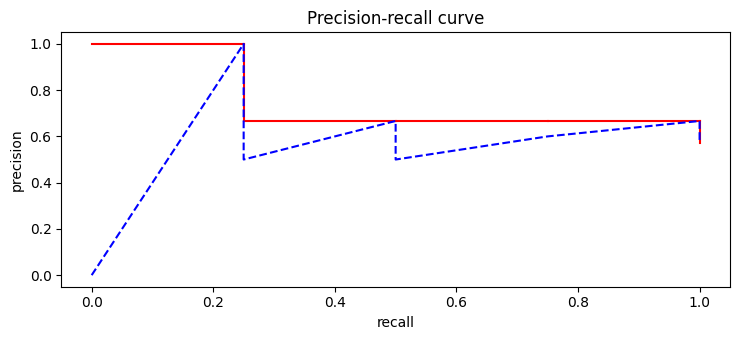

fbeta: 
0.5714285714285714
precison: 
0.5714285714285714
recall: 
0.5714285714285714
accuarcy: 
0.625
MAP: 
0.7333333333333333
DOCUMENT
top news sentences
Analysts said that the deal is aimed at offsetting Johnson & Johnson's reliance on a slowing drug business. 0.1225624531504205
The move by Johnson & Johnson has been widely expected and the firm will pay $76 for each Guidant share, 6% more than Wednesday's closing price. 0.12094226295416849
A number of Johnson & Johnson's products are facing patent expirations, while the company is also battling fierce competition from generic products. 0.11830968808778197
Meanwhile, demand for defibrillators, which give the heart a small electric shock when an irregular heartbeat or rhythm is detected, is expected to increase, analysts said. 0.11651269519647403
They also pointed out that more mergers are likely because the drug and healthcare industries are fragmented and are under pressure to cut costs. 0.11015915808039933
Stents are tubes that are

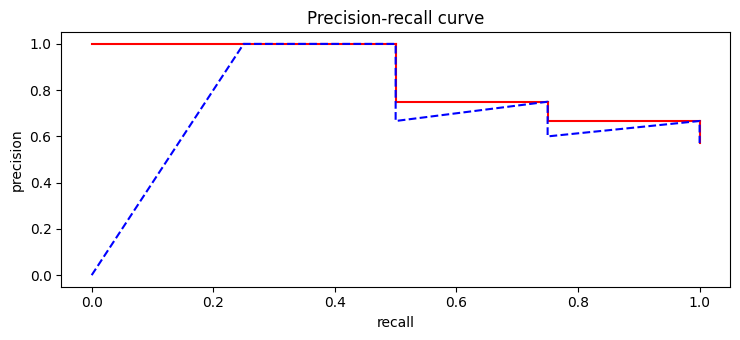

fbeta: 
0.625
precison: 
0.5714285714285714
recall: 
1.0
accuarcy: 
0.6666666666666666
MAP: 
0.8541666666666666
DOCUMENT
top news sentences
The Vantage is "the most important car in the history of our company", said Aston's chief executive Ulrich Bez. 0.12088472316072421
The Vantage will be built at the new Aston factory in Gaydon, near Warwick, and should more than double Aston's total output from about 2,000 presently. 0.10965474926540567
First shown as a concept car at the 2003 North American International Auto Show in Detroit, the V8 Vantage will be available in the UK in late summer. 0.10767853810644132
Mr Bez - himself a former executive at rival Porsche - said the new car was the company's "most affordable car ever and makes the brand accessible". 0.10753506977903604
Development costs for the Vantage have been kept low by sharing a platform with Aston's DB9, which Mr Bez described as "the previous most important car for our company". 0.10422096997246026
Aston - whose cars were f

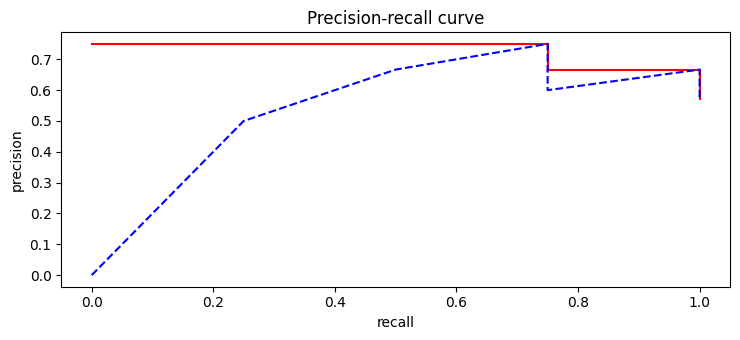

fbeta: 
0.625
precison: 
0.5714285714285714
recall: 
1.0
accuarcy: 
0.7
MAP: 
0.6458333333333333


/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


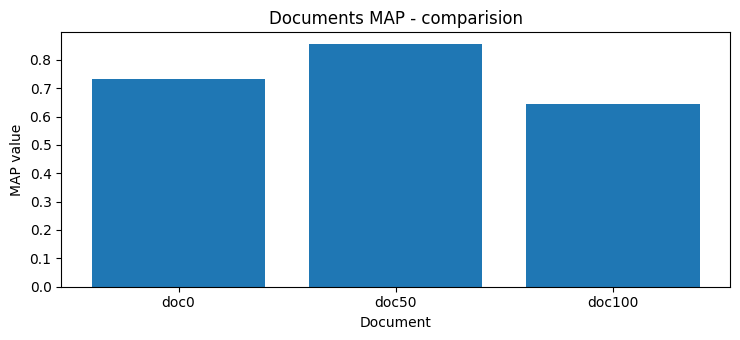

In [11]:
from mainFunctions.graph.pageRank import evaluate_page_rank
from helper.pageRankEvaluation import draw_MAP_chart

DOCUMENTS = ['doc0', 'doc50', 'doc100']

text_processing = True
threshold = 0.2
p = 7
documents = read_files(text_processing)

doc0_ev = evaluate_page_rank(documents[0], threshold, p)
doc1_ev = evaluate_page_rank(documents[50], threshold, p)
doc2_ev = evaluate_page_rank(documents[100], threshold, p)

draw_MAP_chart(doc0_ev, doc1_ev, doc2_ev, DOCUMENTS)

<H2>Question materials (optional)</H2>

<H3>Part I: clustering</H3>

**(a)** What is the (hypothesized) number of document clusters? Are the clusters cohesive? And well
separated?



Most important terms per cluster:
Cluster: 0
Term: brown, TFIDF: 0.00915282331334377
Term: mobile, TFIDF: 0.00831830998163278
Term: tax, TFIDF: 0.0077852287714746515
Term: bank, TFIDF: 0.007030316669418733
Term: howard, TFIDF: 0.006828309056096775
Term: wales, TFIDF: 0.006681548555274886
Term: phone, TFIDF: 0.006083264387344465
Term: software, TFIDF: 0.006062160620486991
Term: china, TFIDF: 0.006026983915512397
Term: ireland, TFIDF: 0.006026873539814537


Cluster: 1
Term: lifts, TFIDF: 0.5558087233196864
Term: tower, TFIDF: 0.30310755748979595
Term: tfc, TFIDF: 0.29271252967044115
Term: speed, TFIDF: 0.21689623534703287
Term: guinness, TFIDF: 0.21391823940167565
Term: elevators, TFIDF: 0.17562751780226468
Term: 101, TFIDF: 0.14524984130024882
Term: records, TFIDF: 0.13479673364023317
Term: passengers, TFIDF: 0.12629527214957165
Term: tallest, TFIDF: 0.11708501186817645


Cluster: 2
Term: newton, TFIDF: 0.21522154081462627
Term: bach, TFIDF: 0.1763626444941514
Term: electrolux, TFIDF:

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


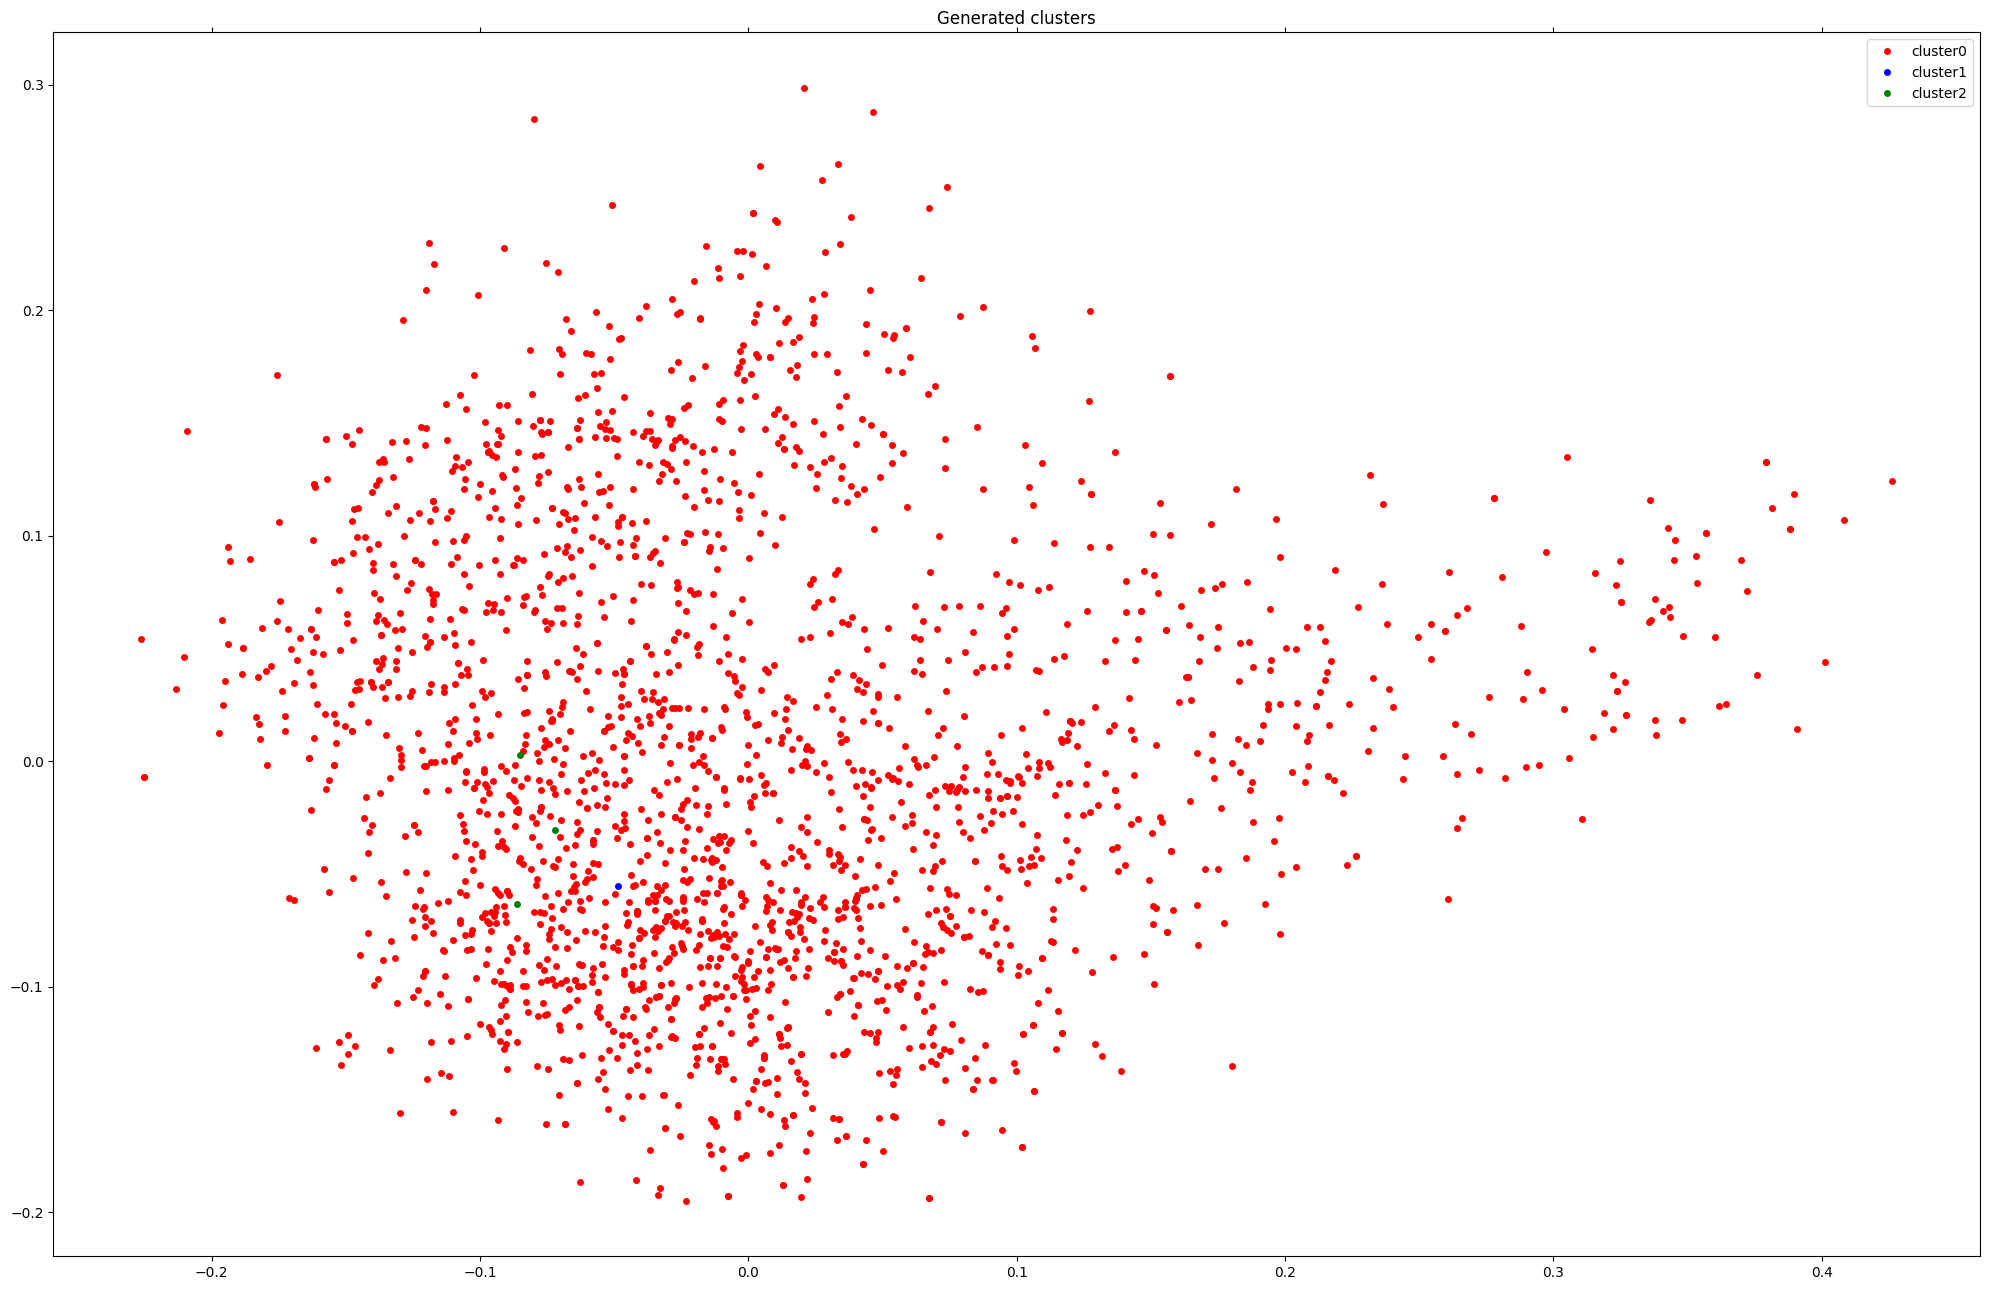



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.02479417577552546
Term: ireland, TFIDF: 0.021952819572404407
Term: injury, TFIDF: 0.021810201065388963
Term: chelsea, TFIDF: 0.021267447711100826
Term: coach, TFIDF: 0.020507528655172552
Term: wales, TFIDF: 0.020447275318268055
Term: rugby, TFIDF: 0.01975634997476685
Term: champion, TFIDF: 0.01779999285152207
Term: league, TFIDF: 0.016610729888993942
Term: victory, TFIDF: 0.0163528141728416


Cluster: 1
Term: brown, TFIDF: 0.011208341278344915
Term: mobile, TFIDF: 0.010733648860193812
Term: tax, TFIDF: 0.010046244627570658
Term: bank, TFIDF: 0.009067934238686336
Term: howard, TFIDF: 0.008638484555064621
Term: software, TFIDF: 0.007846188075816787
Term: phone, TFIDF: 0.007746868474742607
Term: china, TFIDF: 0.007457311661427192
Term: oil, TFIDF: 0.0074499878455633155
Term: awards, TFIDF: 0.007438564032058514


Cluster: 2
Term: newton, TFIDF: 0.21522154081462627
Term: bach, TFIDF: 0.1763626444941514
Term: electrolux, TFID

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


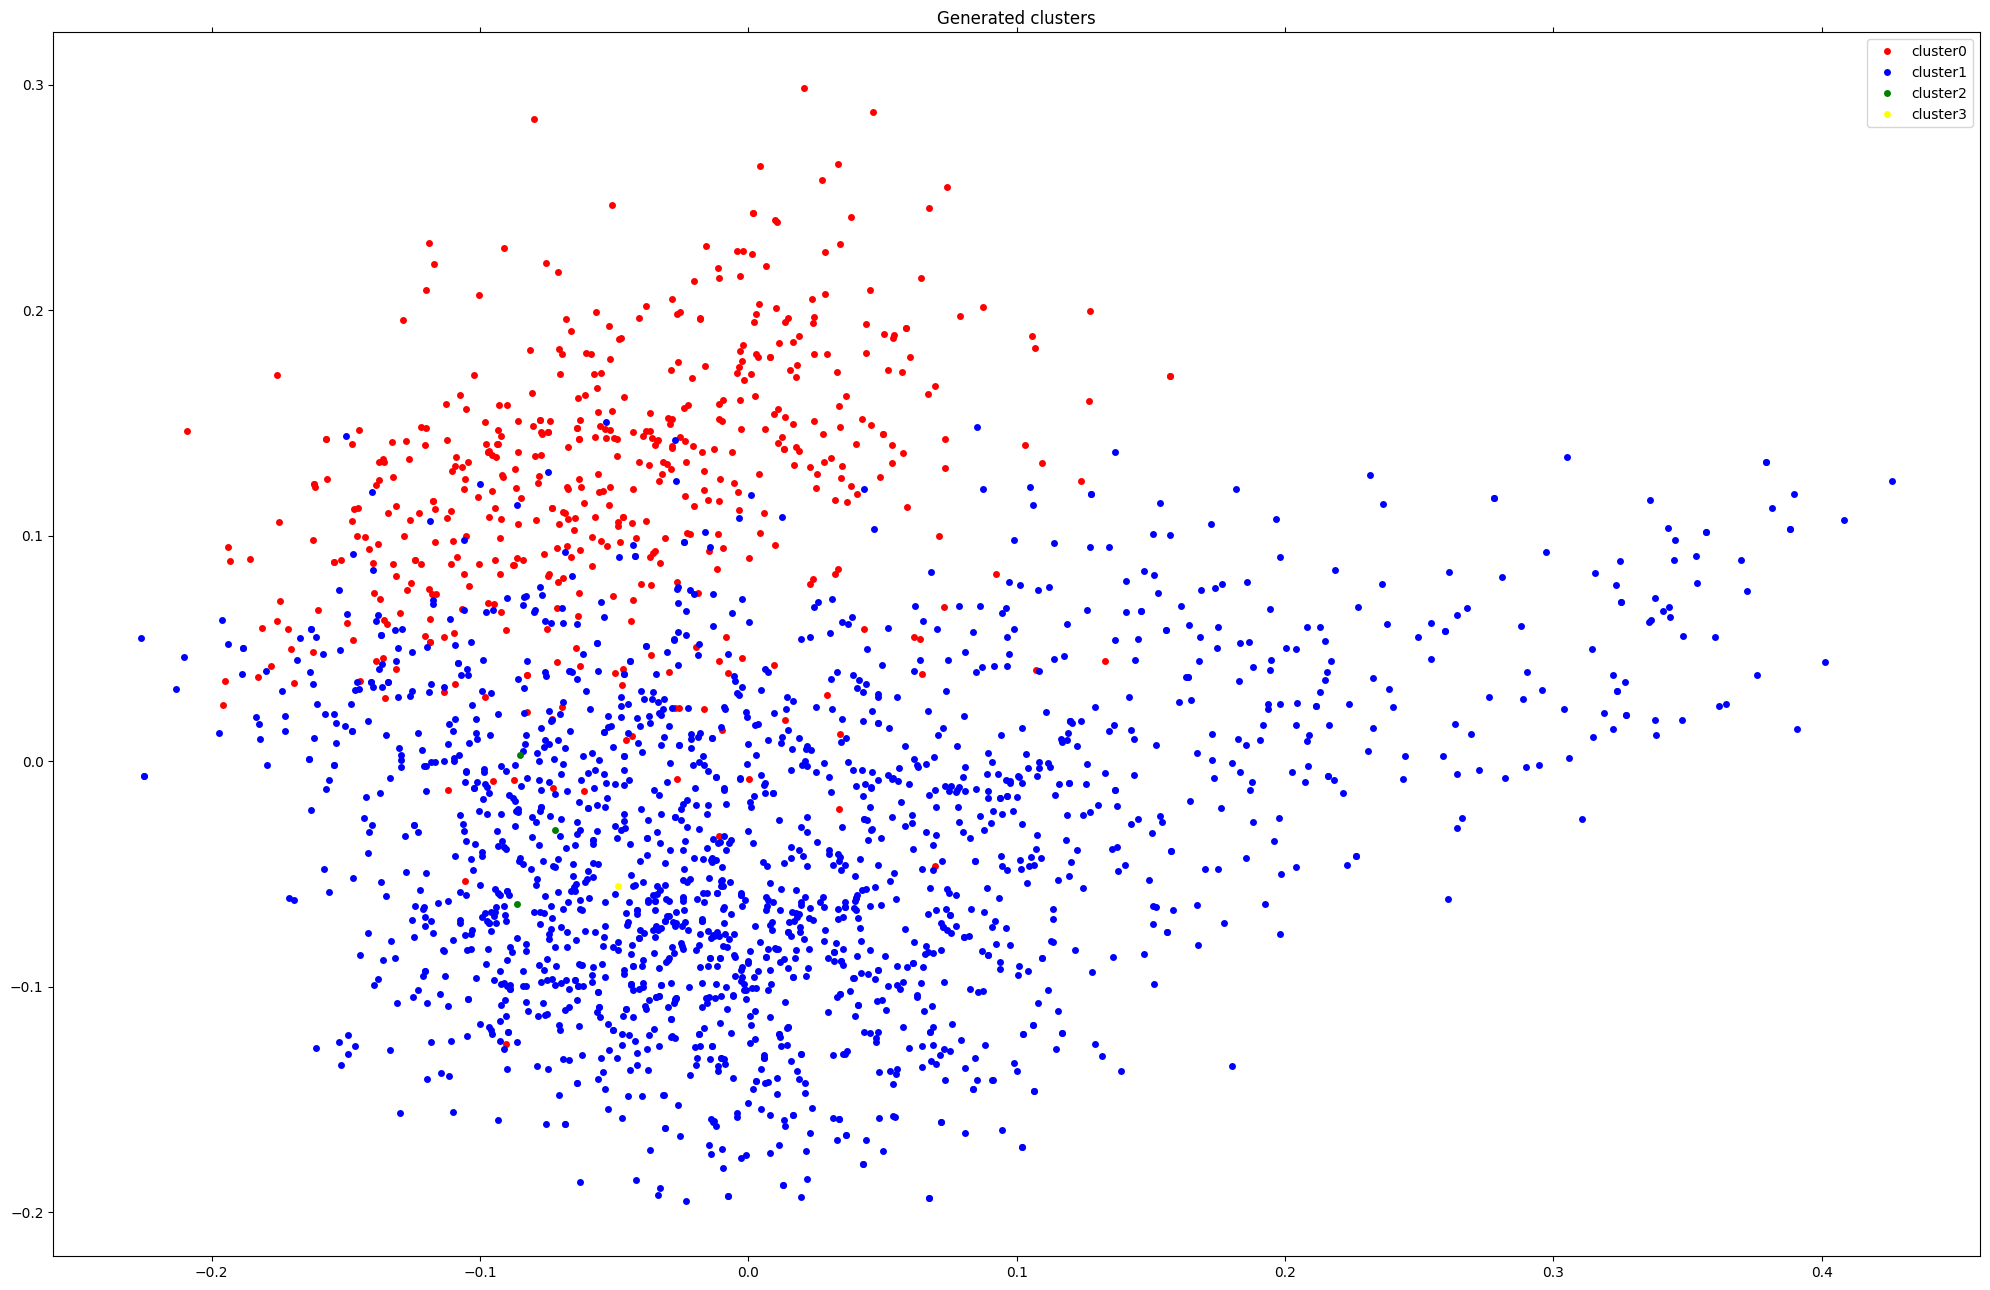



Most important terms per cluster:
Cluster: 0
Term: brown, TFIDF: 0.011208341278344915
Term: mobile, TFIDF: 0.010733648860193812
Term: tax, TFIDF: 0.010046244627570658
Term: bank, TFIDF: 0.009067934238686336
Term: howard, TFIDF: 0.008638484555064621
Term: software, TFIDF: 0.007846188075816787
Term: phone, TFIDF: 0.007746868474742607
Term: china, TFIDF: 0.007457311661427192
Term: oil, TFIDF: 0.0074499878455633155
Term: awards, TFIDF: 0.007438564032058514


Cluster: 1
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 2
Term: newton, TFIDF: 0.21522154081462627
Term: bach, TFIDF: 0.1763626444941514
Term: electrolux, TFI

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


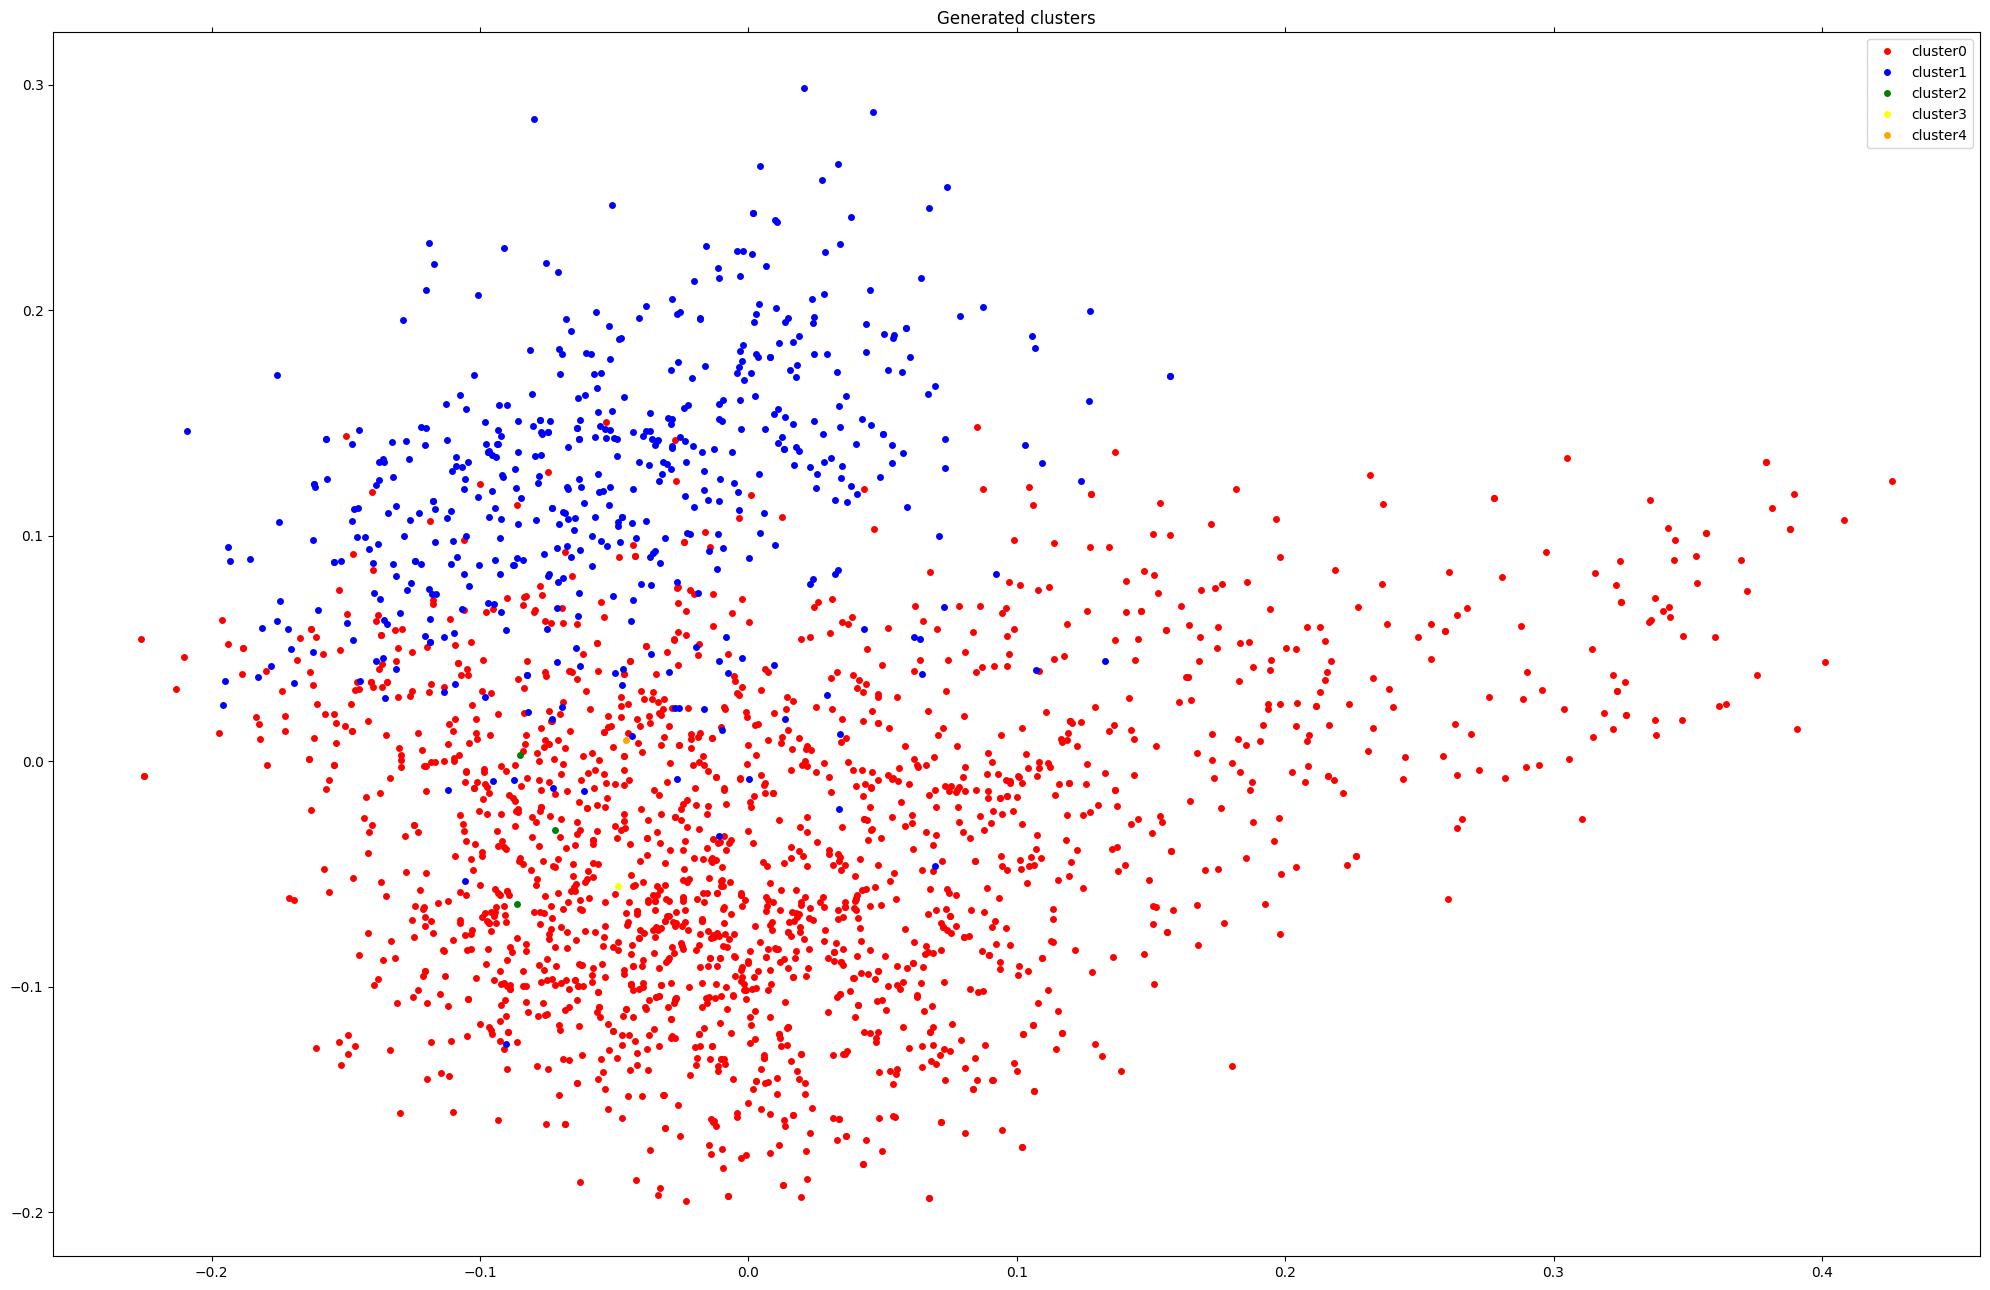



Most important terms per cluster:
Cluster: 0
Term: mobile, TFIDF: 0.013593696894817731
Term: brown, TFIDF: 0.013228067773364395
Term: tax, TFIDF: 0.012727923356866646
Term: bank, TFIDF: 0.011091283611760766
Term: howard, TFIDF: 0.009850252980944692
Term: software, TFIDF: 0.009759812803206288
Term: phone, TFIDF: 0.009728849591149153
Term: oil, TFIDF: 0.00947714170331135
Term: china, TFIDF: 0.00938775594255902
Term: chancellor, TFIDF: 0.009095166235882376


Cluster: 1
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


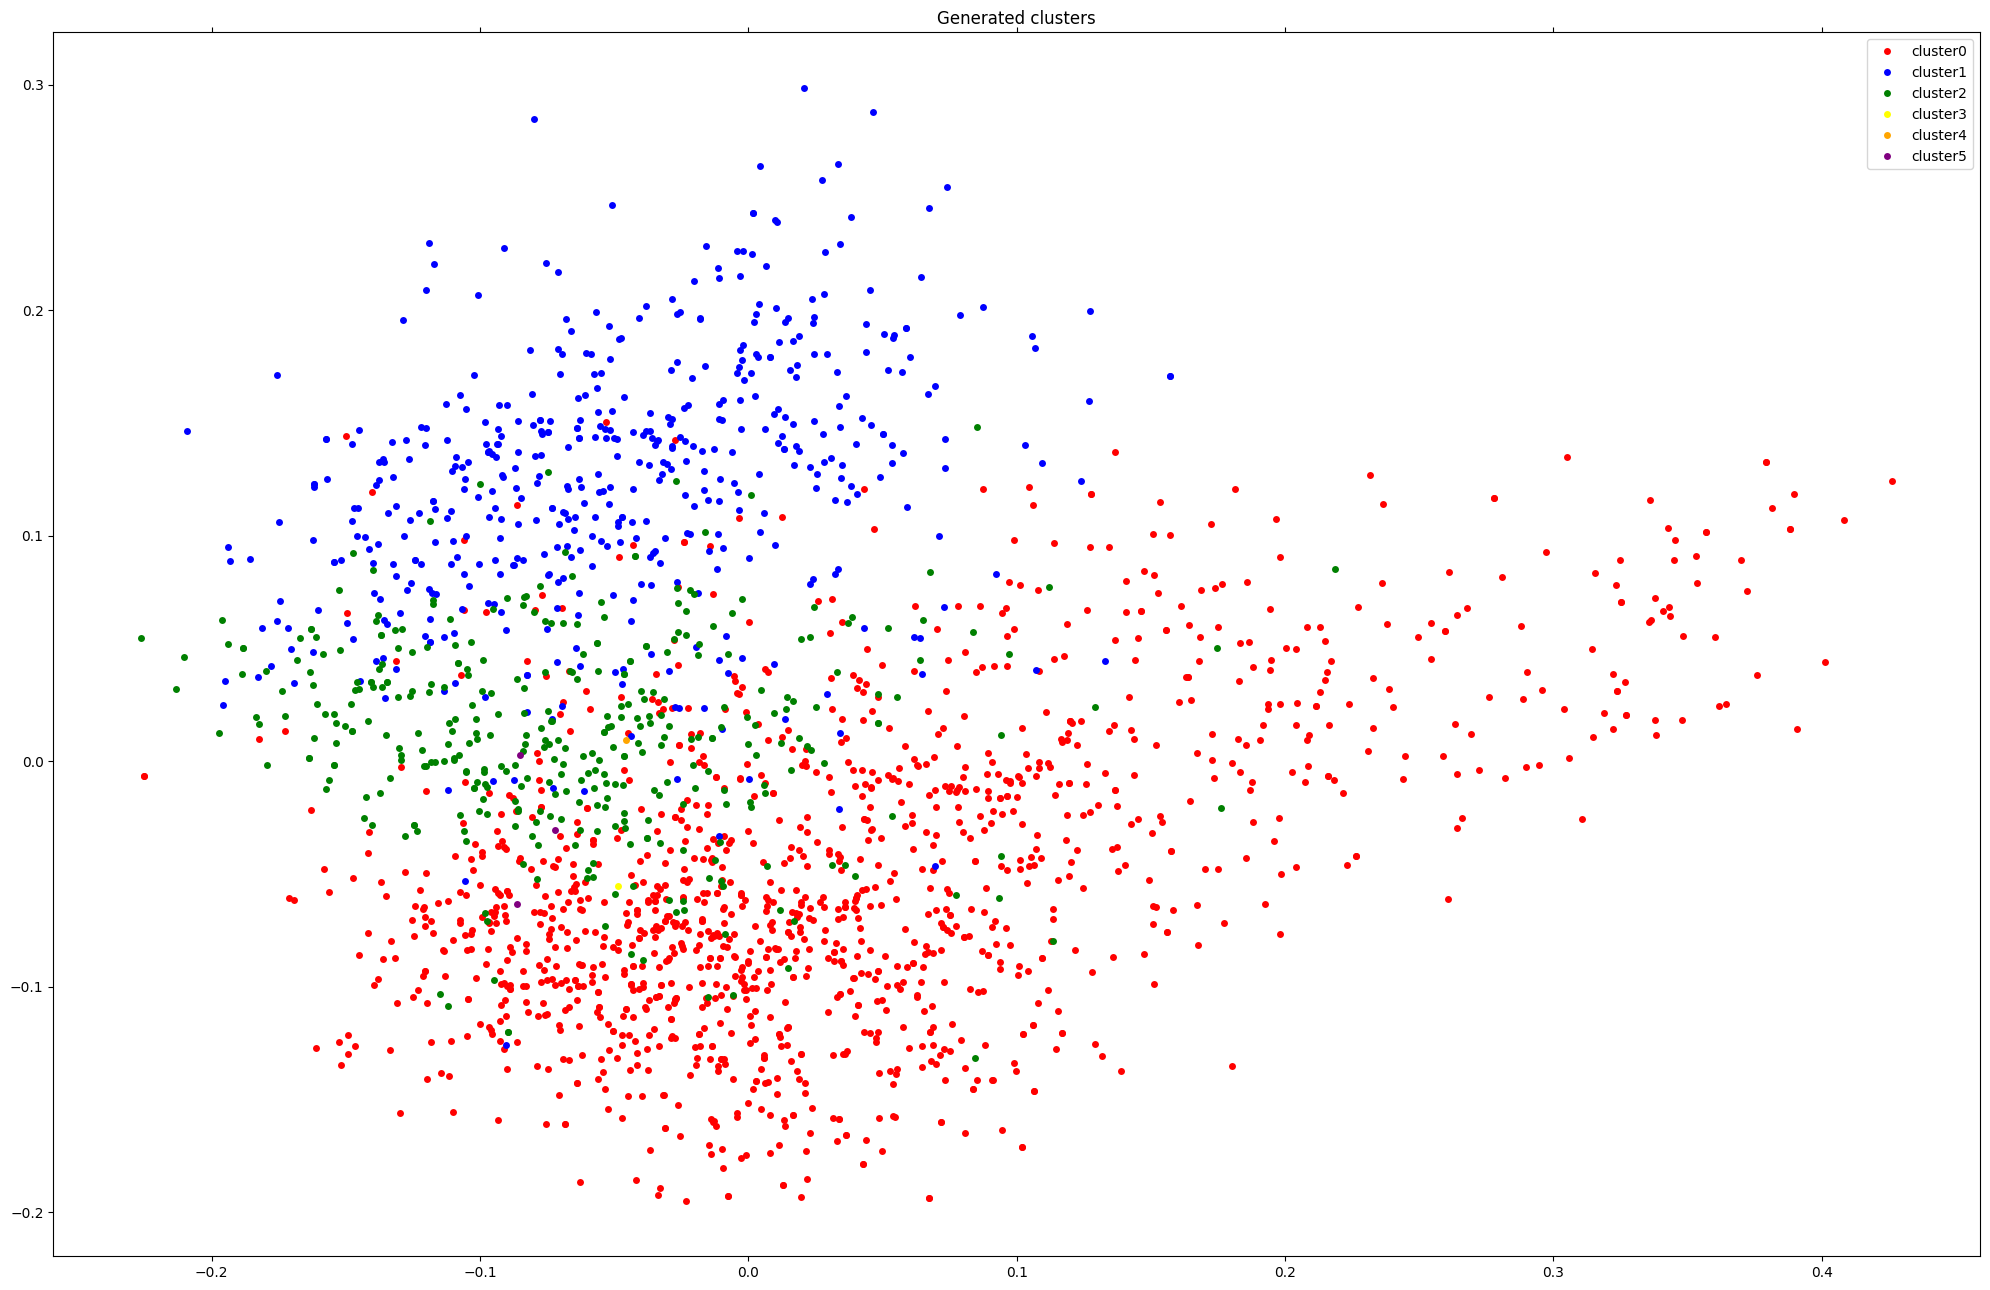



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.02532

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


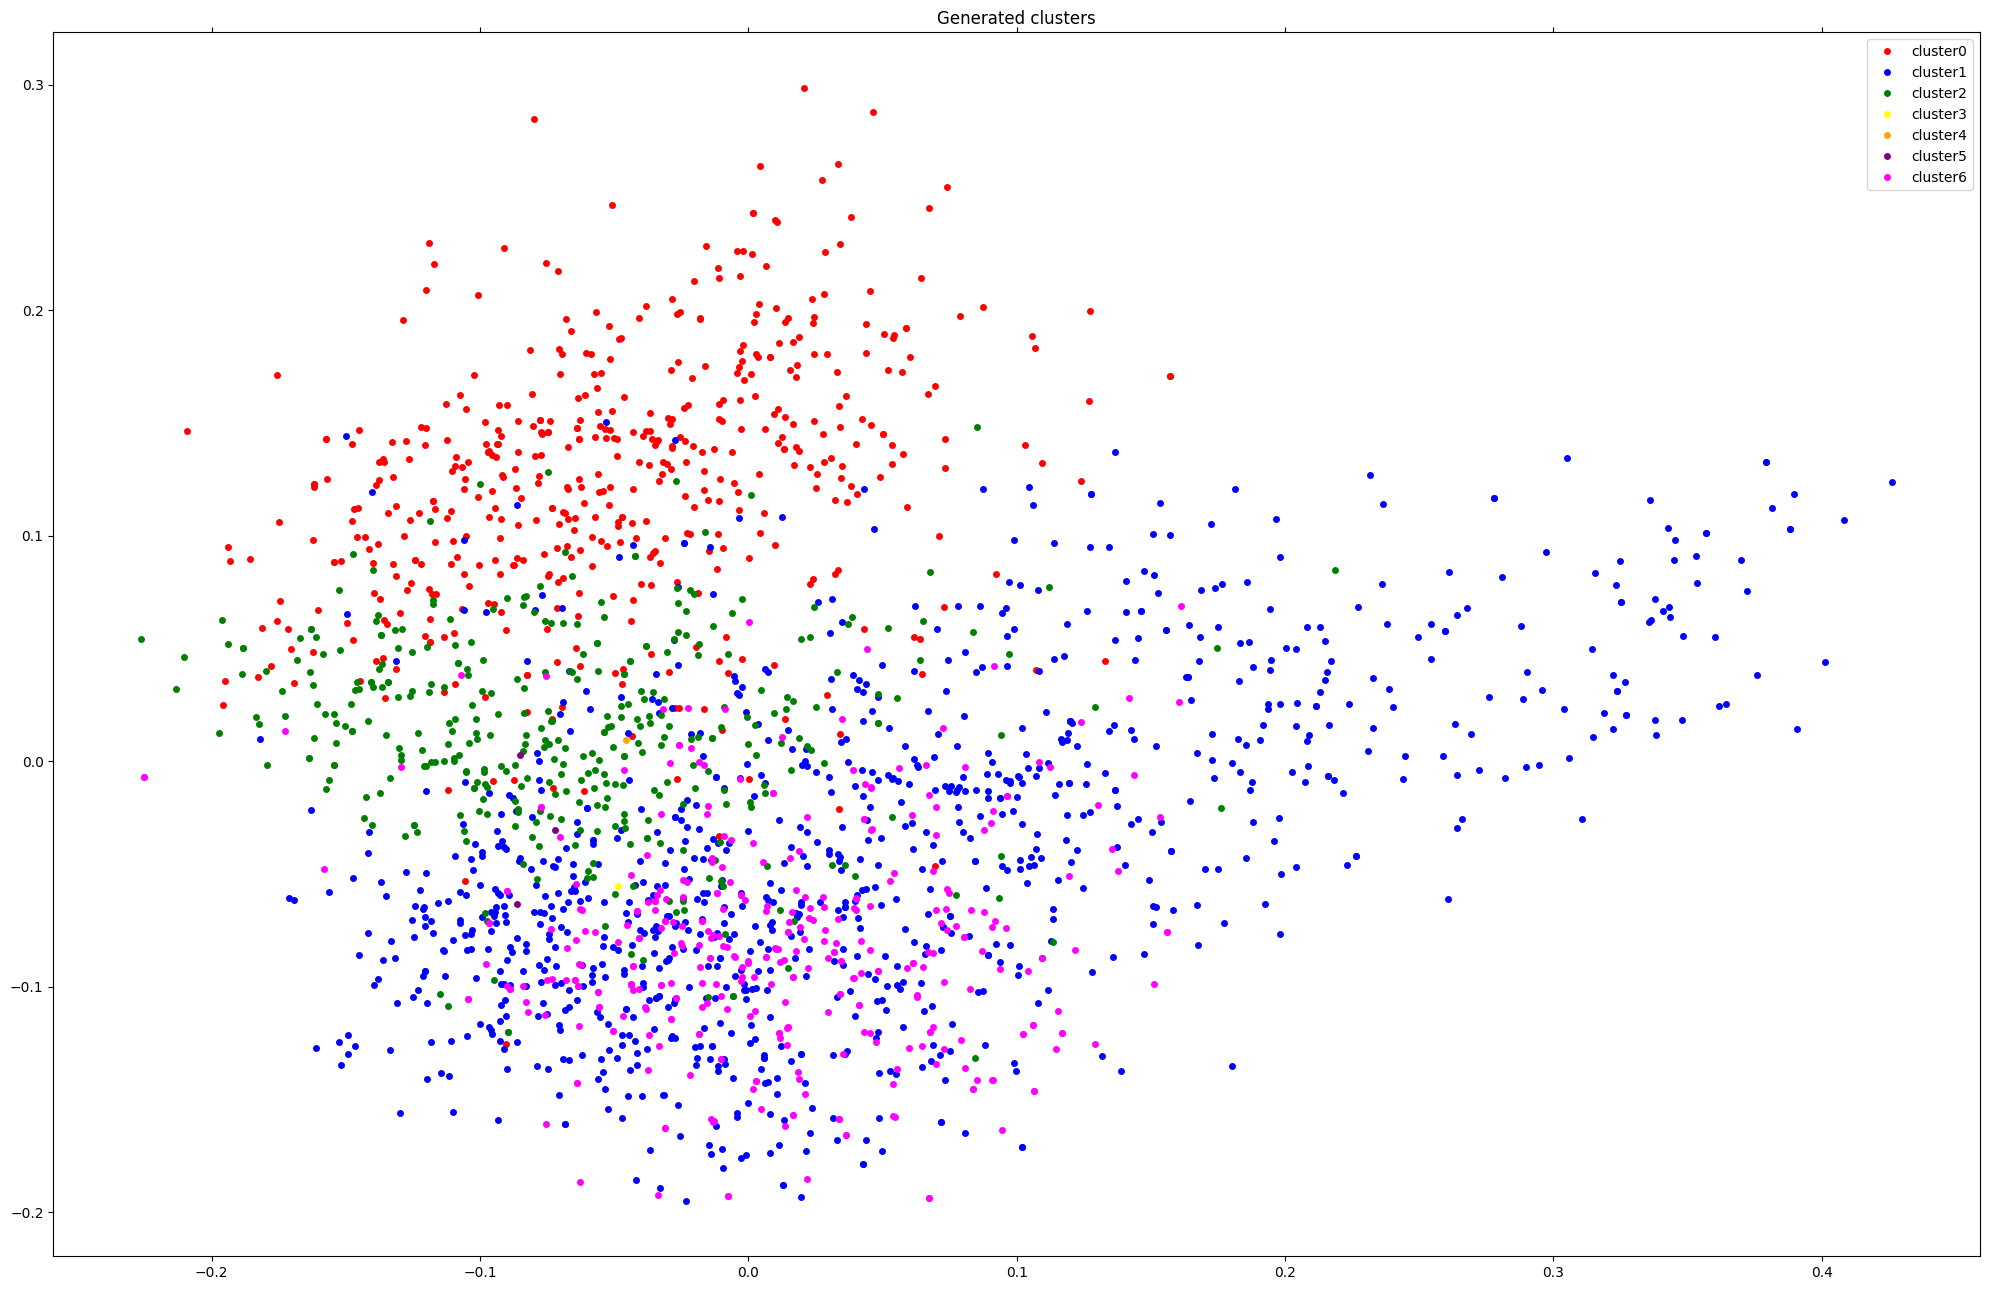



Most important terms per cluster:
Cluster: 0
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.025326456943657816
Term: album, TFIDF: 0.024382514671689736
Term: festival, TFIDF: 0.023766358069099183
Term: actor, TFIDF: 0.020451090835083816
Term: films, TFIDF: 0.018771840671338604
Term: chart, TFIDF: 0.018600576795178212
Term: actress, TFIDF: 0.018127197146144233
Term: comedy, TFIDF: 0.01771174884156886


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: cup, TFIDF: 0.02499213326674722
Term: ireland, TFIDF: 0.022128091584958532
Term: injury, TFIDF: 0.02198

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


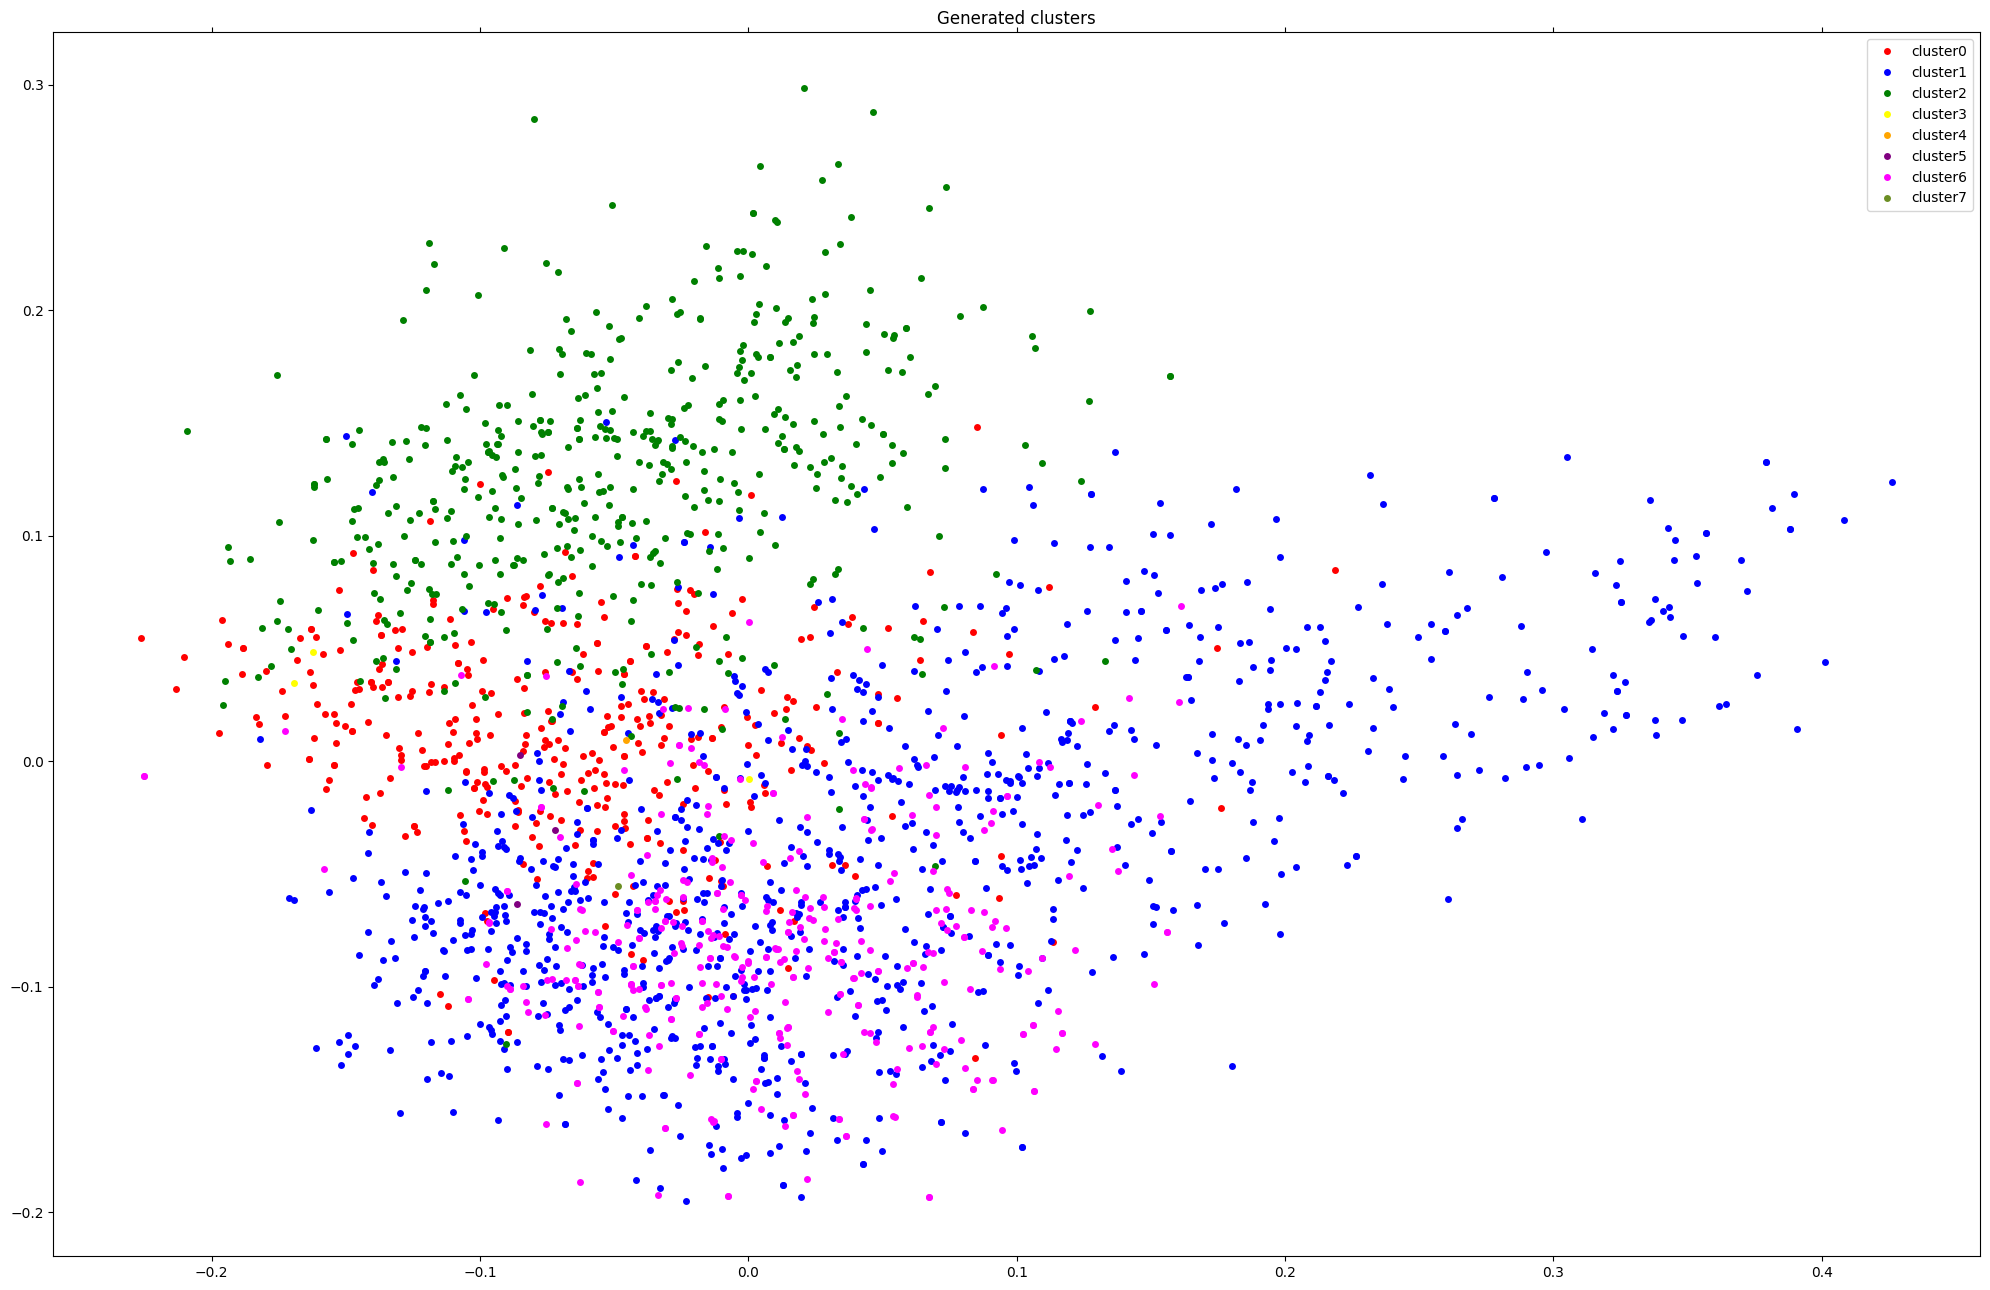



Most important terms per cluster:
Cluster: 0
Term: awards, TFIDF: 0.0334211944636454
Term: award, TFIDF: 0.029530684171797432
Term: band, TFIDF: 0.026168333628765555
Term: album, TFIDF: 0.025193013774349782
Term: festival, TFIDF: 0.024556375511839323
Term: actor, TFIDF: 0.021130905488881618
Term: chart, TFIDF: 0.01896290694593981
Term: films, TFIDF: 0.018907113862522612
Term: actress, TFIDF: 0.01872976325626537
Term: comedy, TFIDF: 0.018300505035748434


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: cup, TFIDF: 0.02499213326674722
Term: ireland, TFIDF: 0.022128091584958532
Term: injury, TFIDF: 0.0219843

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


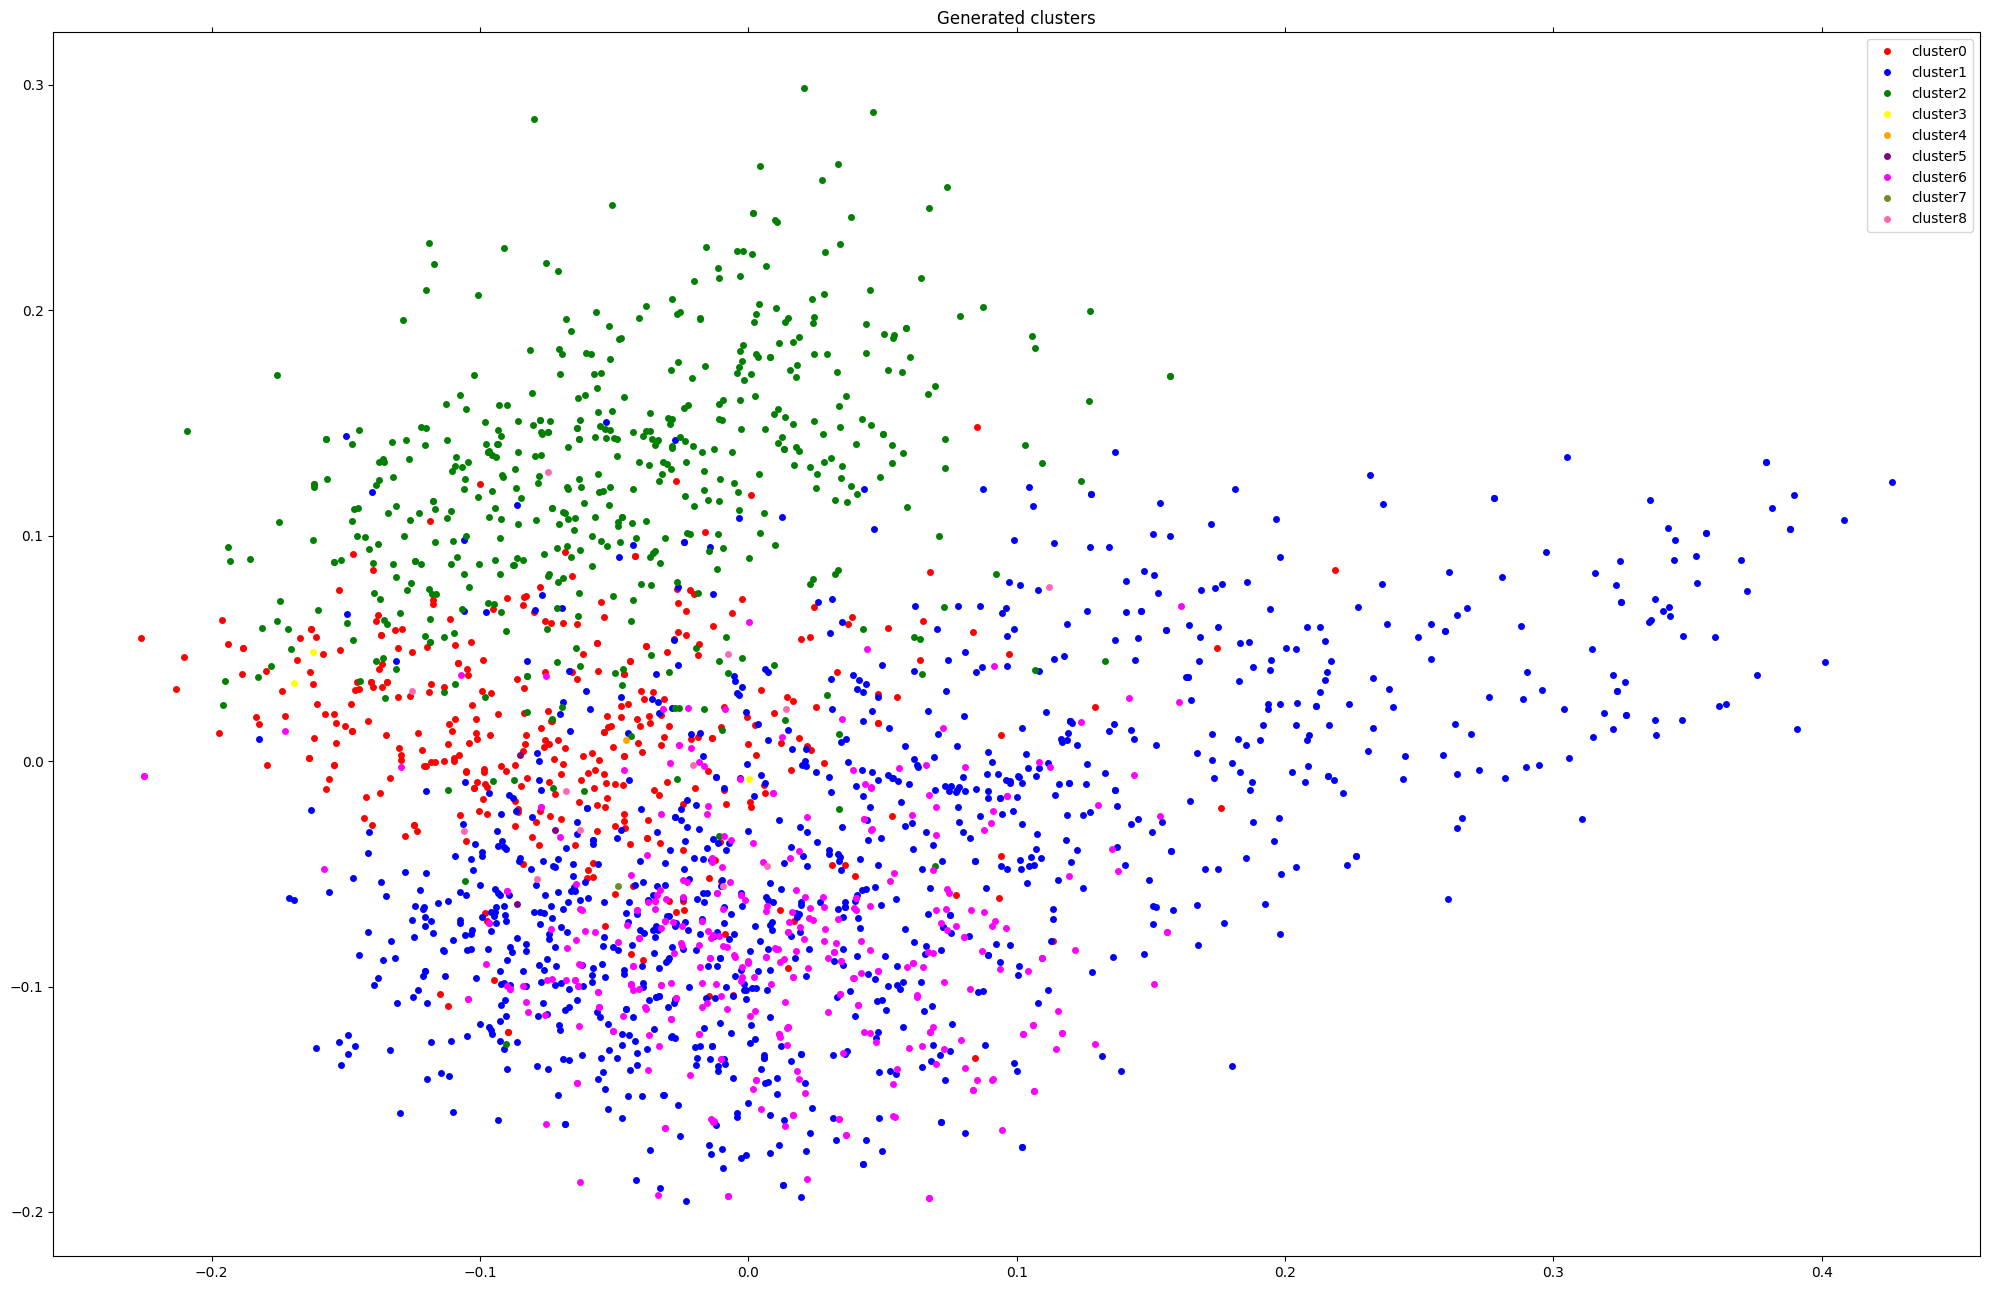



Most important terms per cluster:
Cluster: 0
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 1
Term: awards, TFIDF: 0.03487009017738726
Term: award, TFIDF: 0.030471523211464645
Term: band, TFIDF: 0.027123061778728457
Term: album, TFIDF: 0.026285196452428532
Term: festival, TFIDF: 0.02541591604667881
Term: actor, TFIDF: 0.022046985206607698
Term: chart, TFIDF: 0.019784998287526796
Term: films, TFIDF: 0.01961077997735899
Term: actress, TFIDF: 0.019541747212461845
Term: comedy, TFIDF: 0.01882599780795311


Cluster: 2
Term: cup, TFIDF: 0.02499213326674722
Term: ireland, TFIDF: 0.022128091584958532
Term: injury, TFIDF: 0.0219843

/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


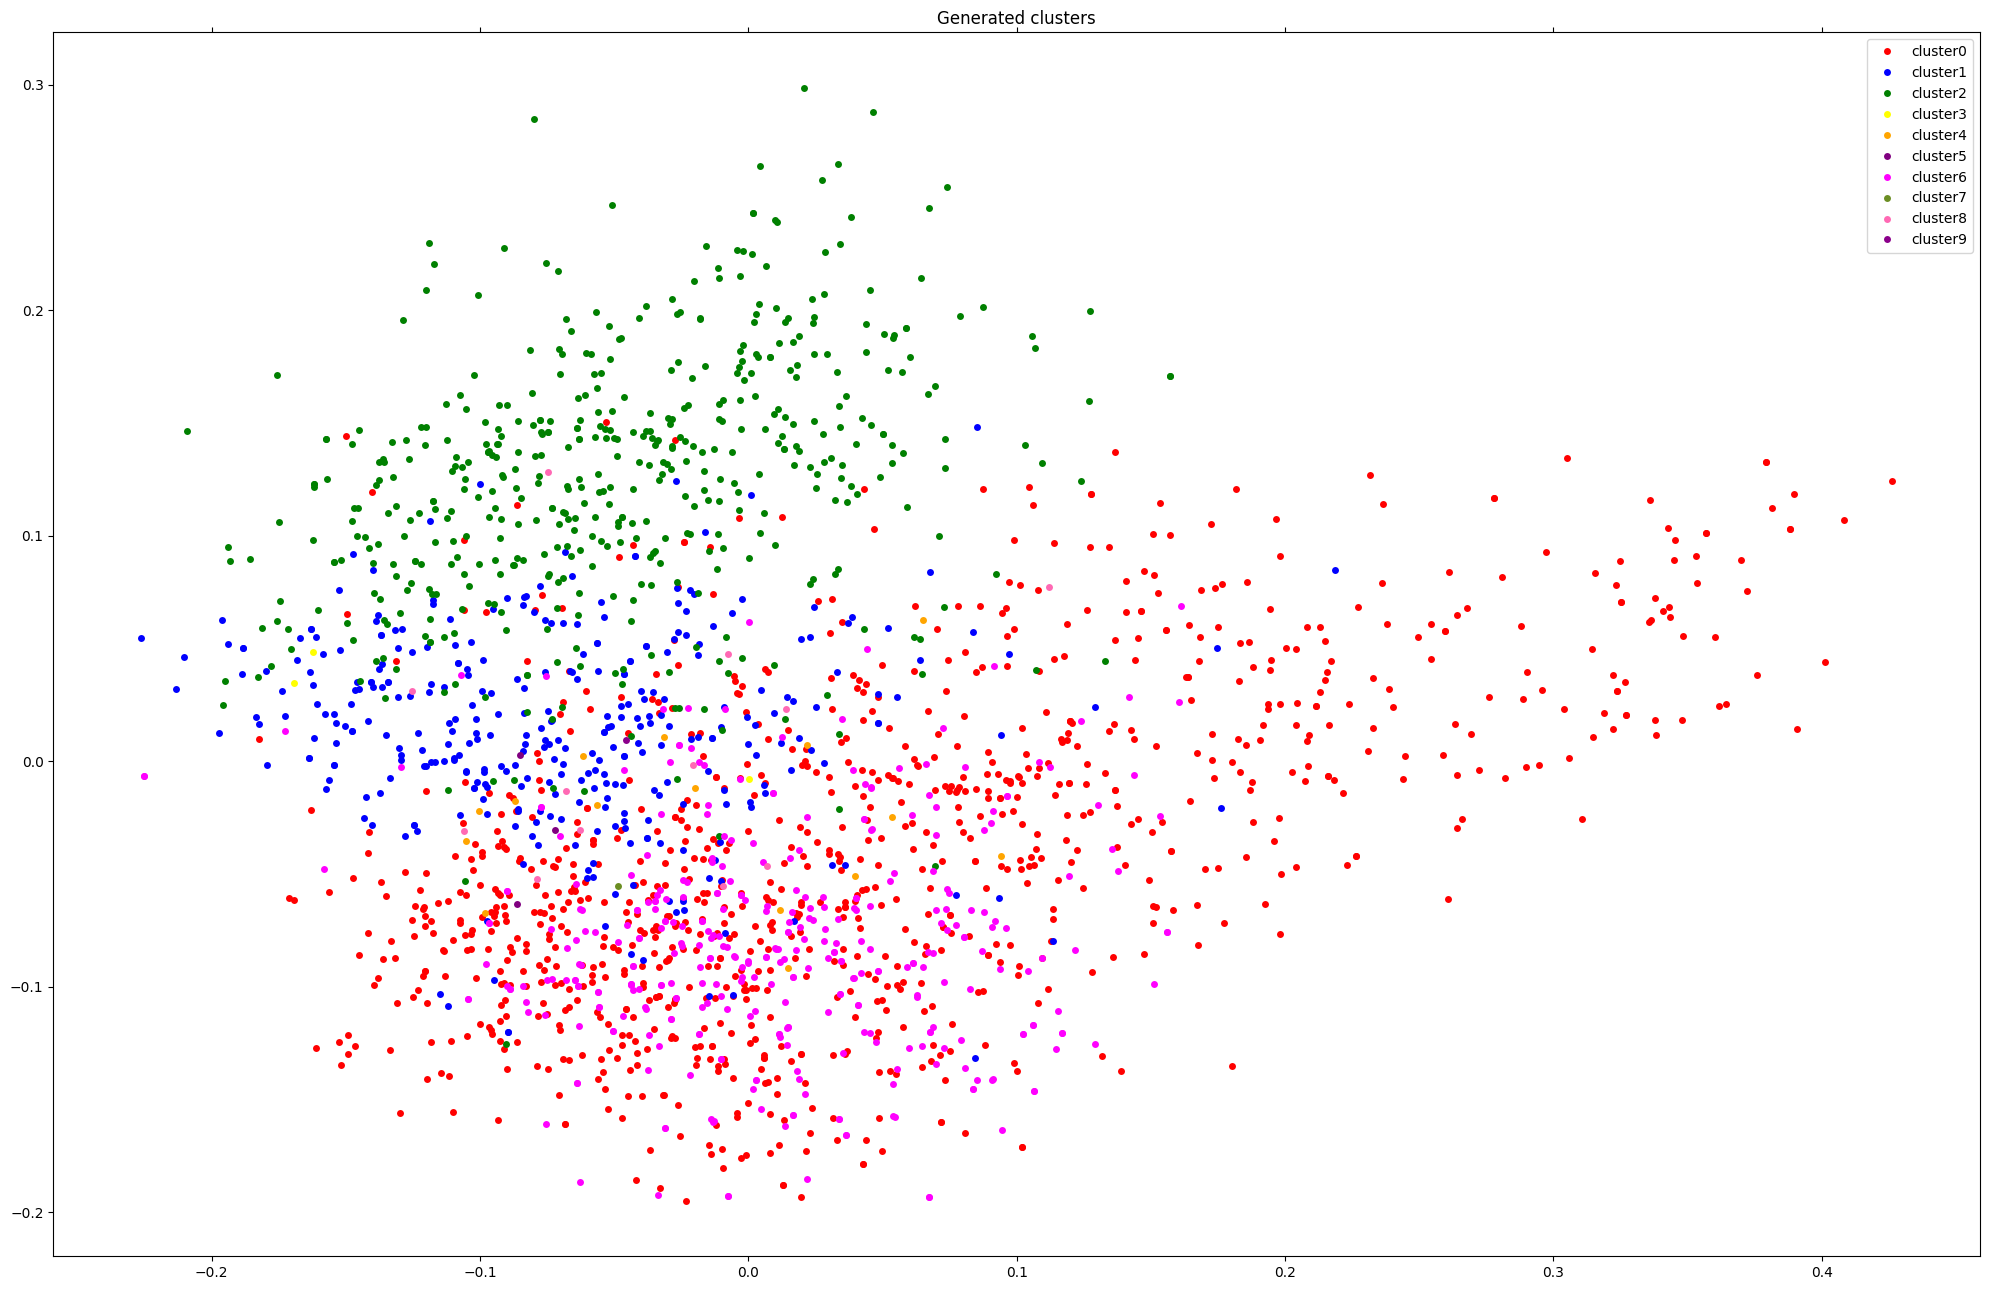

In [12]:
#code, statistics and/or charts here
sil_scores = []
ran_scores = []
pur_scores = []
for num_clusters in range(3,11):
    args = {'n_clusters': num_clusters, 'max_df': 0.07, 'criteria': 'mean'}
    cluster_model = clustering(documents, args)
    cluster_data = cluster_model.labels_

    #code and charts here
    print("\n\nMost important terms per cluster:")
    relevant_term_list = interpret(cluster_data, documents, args)
    for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
        print("Cluster: " + str(index))
        for i in range(10):
            term = cluster_relevant_terms[i][0]
            tfidf = cluster_relevant_terms[i][1]
            print("Term: " + term + ", TFIDF: " + str(tfidf))
        print("\n")

    sil_score, ran_score, pur_score = evaluate(cluster_data, documents)
    sil_scores.append(sil_score)
    ran_scores.append(ran_score)
    pur_scores.append(pur_score)

    print("\n\nEvaluation:")
    print("Silhouette score: " + str(sil_score))
    print("Ran score: ", str(ran_score))
    print("Purity score: " + str(pur_score))

    pca_plot(cluster_data, documents)

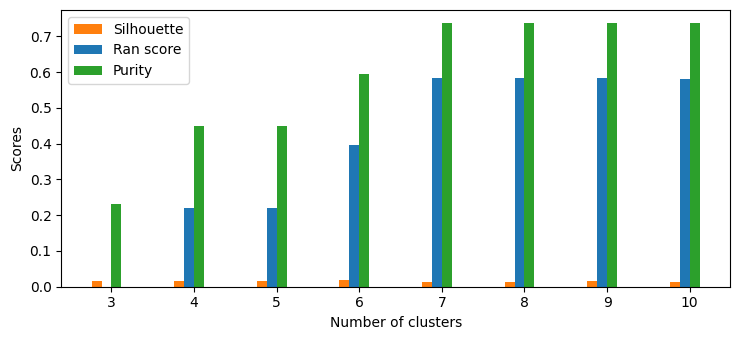

In [13]:
N = 8

ind = np.arange(N)  # the x locations for the groups
width = 0.12       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, sil_scores, width, color='#ff7f0e')
rects2 = ax.bar(ind, ran_scores, width, color='#1f77b4')
rects3 = ax.bar(ind + width, pur_scores, width, color='#2ca02c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_xlabel('Number of clusters')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('3', '4', '5', '6', '7', '8', '9', '10'))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Silhouette', 'Ran score', 'Purity'))

plt.show()

**(b)** What the clustering reveals regarding the conceptual organization of documents?

In [14]:
#code, statistics and/or charts here

**...** (additional questions with empirical results)

<H3>Part II: Supervised approach using reference summaries</H3>

**(c)** Which features appear to be more relevant to the target summarization task?


In [15]:
check_accuracy_documents_bayes_no_idf_cosine(documents)
check_accuracy_documents_bayes_idf_cosine(documents)
check_accuracy_documents_bayes_no_idf_position(documents)
check_accuracy_documents_bayes_idf_position(documents)

Bayes no idf average cosine: 0.520002998733957
Bayes no idf average cosine: 0.5227399782239477
Bayes idf average position: 0.48714508949483387
Bayes idf average position: 0.4862970517738071


<H3>END</H3>